### MULTIPLE REGRESSION

In [8]:
## import required packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

In [9]:
## get the data
boston_data = load_boston()
print(boston_data.keys())
data = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
data["MEDV"] = boston_data.target
print(data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 14)


In [10]:
## dependent data
X = data.drop("MEDV", axis = 1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
## independent data
y = data["MEDV"]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### STATSMODELS

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

we need to add a constant to calculate the bias or weights.

$y = mX$

$y = mX + C$

In [16]:
## added a constant term in the dataframe as const
X_constant = sm.add_constant(X)
pd.DataFrame(X_constant).head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
sm.OLS?

Init signature: sm.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
Docstring:     
Ordinary Least Squares

Parameters
----------
endog : array_like
    A 1-d endogenous response variable. The dependent variable.
exog : array_like
    A nobs x k array where `nobs` is the number of observations and `k`
    is the number of regressors. An intercept is not included by default
    and should be added by the user. See
    :func:`statsmodels.tools.add_constant`.
missing : str
    Available options are 'none', 'drop', and 'raise'. If 'none', no nan
    checking is done. If 'drop', any observations with nans are dropped.
    If 'raise', an error is raised. Default is 'none'.
hasconst : None or bool
    Indicates whether the RHS includes a user-supplied constant. If True,
    a constant is not checked for and k_constant is set to 1 and all
    result statistics are calculated as if a constant is present. If
    False, a constant is not checked for and k_constant is set to 0.
**kwa

In [18]:
model = sm.OLS(y, X_constant)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          6.72e-135
Time:                        11:19:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### STATSMODEL.FORMULA.API

In [20]:
form_lr = smf.ols(formula = "y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = data)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          6.72e-135
Time:                        11:34:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
## Exercise
form_lr = smf.ols(formula="y~CRIM+ZN+INDUS+CHAS+NOX+RM", data=data)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     118.4
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.32e-92
Time:                        11:35:27   Log-Likelihood:                -1616.3
No. Observations:                 506   AIC:                             3247.
Df Residuals:                     499   BIC:                             3276.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.9546      3.214     -5.587      0.000     -24.269     -11.640
CRIM          -0.1769      0.035     -5.114      0.000      -0.245      -0.109
ZN             0.0213      0.014      1.537      0.125      -0.006       0.048
INDUS         -0.1437      0.064     -2.247      0.025      -0.269      -0.018
CHAS           4.7847      1.059      4.518      0.000       2.704       6.866
NOX           -7.1849      3.694     -1.945      0.052     -14.442       0.072
RM             7.3416      0.417     17.597      0.000       6.522       8.161
==============================================================================
Omnibus:                      218.887   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.877
Skew:                           1.738   Prob(JB):                         0.00
Kurtosis:                      10.786   Cond. No.                         420.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Correlation Matrix

Collinearity between predictors.

In [23]:
pd.options.display.float_format = "{:,.4f}".format
corr_matrix = data.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130,0.3604
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038,-0.4837
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539,0.1753
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023,-0.3770
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970,0.2499
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440,-0.4685


In [24]:
## using mask
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6255,0.0000,0.0000,0.0000,0.0000,0.0000
ZN,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6644,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
INDUS,0.0000,0.0000,1.0000,0.0000,0.7637,0.0000,0.6448,-0.7080,0.0000,0.7208,0.0000,0.0000,0.6038,0.0000
CHAS,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NOX,0.0000,0.0000,0.7637,0.0000,1.0000,0.0000,0.7315,-0.7692,0.6114,0.6680,0.0000,0.0000,0.0000,0.0000
RM,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6138,0.6954
AGE,0.0000,0.0000,0.6448,0.0000,0.7315,0.0000,1.0000,-0.7479,0.0000,0.0000,0.0000,0.0000,0.6023,0.0000
DIS,0.0000,0.6644,-0.7080,0.0000,-0.7692,0.0000,-0.7479,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RAD,0.6255,0.0000,0.0000,0.0000,0.6114,0.0000,0.0000,0.0000,1.0000,0.9102,0.0000,0.0000,0.0000,0.0000
TAX,0.0000,0.0000,0.7208,0.0000,0.6680,0.0000,0.0000,0.0000,0.9102,1.0000,0.0000,0.0000,0.0000,0.0000


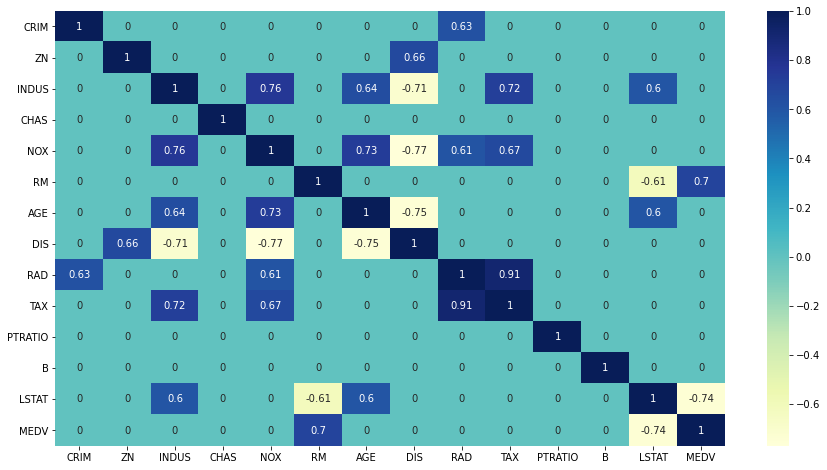

In [25]:
## plot the heatmap
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot = True, cmap = "YlGnBu")
plt.show()

### Detecting Collinearity with EigenVectors

In [33]:
eigenvalues, eigenvectors = np.linalg.eig(data.corr())
#print(eigenvalues)
#print(eigenvectors)

pd.Series(eigenvalues).sort_values()
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending = False)
print(data.columns[2],data.columns[8],data.columns[9])

INDUS RAD TAX


### Revisiting Feature Importance and Extractions

In [34]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300,36.2000


(array([ 54., 100., 108.,  32.,  74.,   1.,   0.,   0.,   0., 137.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <a list of 10 Patch objects>)

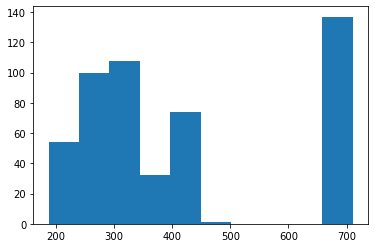

In [35]:
plt.hist(data["TAX"])

(array([75., 80., 89., 60., 78., 30., 57., 21.,  0., 16.]),
 array([0.385 , 0.4336, 0.4822, 0.5308, 0.5794, 0.628 , 0.6766, 0.7252,
        0.7738, 0.8224, 0.871 ]),
 <a list of 10 Patch objects>)

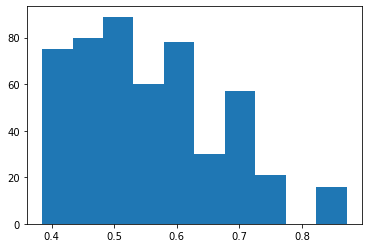

In [37]:
plt.hist(data["NOX"])

The Distribution of these two are not Standard. It will affect the model Perfomance.

### Standardize the Variable to Identify the key features.

+ Checking the Difference of the Data Distribution before and after StandardScaling

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
result = pd.DataFrame(list(zip(model.coef_, data.columns)), columns = ["coefficient","name"]).set_index("name")
np.abs(result).sort_values(by = "coefficient", ascending = True)

,coefficient
name,
AGE,0.0007
B,0.0093
TAX,0.0123
INDUS,0.0206
ZN,0.0464
CRIM,0.1080
RAD,0.3060
LSTAT,0.5248
PTRATIO,0.9527


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
standard_coefficient_linear_reg = make_pipeline(scaler, model)
standard_coefficient_linear_reg.fit(X,y)
result = pd.DataFrame(list(zip(standard_coefficient_linear_reg.steps[1][1].coef_, data.columns)), columns = ["coefficient","name"]).set_index("name")
np.abs(result).sort_values(by = "coefficient", ascending = True)

,coefficient
name,
AGE,0.0195
INDUS,0.1409
CHAS,0.6817
B,0.8493
CRIM,0.9281
ZN,1.0816
NOX,2.0567
PTRATIO,2.0606
TAX,2.0768


### USE $R^2$ to Identify the Key Features.

+ Compare $R^2$ of the model against $R^2$ of the model without a Feature.
+ A Significant Change in the $R^2$ value signifies that the importance of the Feature.

With Full Features

In [53]:
from sklearn.metrics import r2_score
linear_reg = smf.ols(formula = "y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = data)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(data))

0.7406426641094093

Without LSTAT

In [54]:
linear_reg = smf.ols(formula = "y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B", data = data)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(data))

0.6842042799773888

Without AGE

In [55]:
linear_reg = smf.ols(formula = "y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = data)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(data))

0.7406412165505145